In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from data_preprocesser import preprocessed_data_path

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv(preprocessed_data_path + 'categories_30000/yelp_academic_dataset_review_Auto Repair.csv')
df.head()

,review_id,business_id,stars_x,stars_y,date,city,text,categories
0,JN0tmjiksWfr4i2NIFuPXw,pLZ9oZM8c6MNbRlg06lBPg,1,3.0,2016-08-03,Las Vegas,THEY SELL WRECKED VEHICLES! \nI purchased a 20...,Auto Repair;Car Dealers;Automotive;Auto Parts ...
1,lFmz61DNRzBPnrwH_cF42g,J0KZR0DDnvj73D-xmbh4uA,4,4.0,2017-06-15,Las Vegas,I stopped in here recently as I had to buy a t...,Auto Parts & Supplies;Auto Repair;Automotive
2,R9p3ug8zNPvawYX_jsO0UA,Tknj3u-3CZTI-q52saTAIA,1,1.0,2012-09-12,Toronto,"If you want the ""I don't give a shit "" attitud...",Car Dealers;Auto Repair;Automotive
3,FMXER_6R6URYBpV6TYPn9A,rV1nkTx58v_q7YGDkGzfxQ,5,5.0,2016-06-10,Las Vegas,where to start...\na few months ago I slammed....,Auto Repair;Automotive
4,bJN2ZPa0jF4xgR1gPKZP3A,hCXknMQalY1QQZrdZGuBHg,3,3.5,2017-01-24,Las Vegas,I have mixed feelings here. I recently purchas...,Car Dealers;Auto Repair;Automotive


In [3]:
# Processing Functions
def identify_tokens(row):
    review = row['text']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    # token_words = [re.sub("[^\w\s]", " ", w) for w in tokens]
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['words']
    meaningful_words = [w for w in my_list if not w in stops and w != " "]
    return (meaningful_words)

stemming = PorterStemmer()

def stem_list(row):
    my_list = row['words_meaningful']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

lemming = WordNetLemmatizer()

def lem_list(row):
    my_list = row['words_non_stop']
    lemmed_list = [lemming.lemmatize(word) for word in my_list]
    return (lemmed_list)

def rejoin_words(row):
    my_list = row['words_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

In [4]:
def process(data_df):
    data_df['text'] = data_df['text'].str.lower()
    data_df['words'] = data_df.apply(identify_tokens, axis=1)
    data_df['words_non_stop'] = data_df.apply(remove_stops, axis=1)
    data_df['words_meaningful'] = data_df.apply(lem_list, axis=1)
    data_df['processed'] = data_df.apply(rejoin_words, axis=1)
    return data_df

In [5]:
df_processed = process(df)

In [6]:
df_processed

,review_id,business_id,stars_x,stars_y,date,city,text,categories,words,words_non_stop,words_meaningful,processed
0,JN0tmjiksWfr4i2NIFuPXw,pLZ9oZM8c6MNbRlg06lBPg,1,3.0,2016-08-03,Las Vegas,they sell wrecked vehicles! \ni purchased a 20...,Auto Repair;Car Dealers;Automotive;Auto Parts ...,"[they, sell, wrecked, vehicles, i, purchased, ...","[sell, wrecked, vehicles, purchased, nissan, a...","[sell, wrecked, vehicle, purchased, nissan, al...",sell wrecked vehicle purchased nissan altima m...
1,lFmz61DNRzBPnrwH_cF42g,J0KZR0DDnvj73D-xmbh4uA,4,4.0,2017-06-15,Las Vegas,i stopped in here recently as i had to buy a t...,Auto Parts & Supplies;Auto Repair;Automotive,"[i, stopped, in, here, recently, as, i, had, t...","[stopped, recently, buy, torque, wrench, staff...","[stopped, recently, buy, torque, wrench, staff...",stopped recently buy torque wrench staff pleas...
2,R9p3ug8zNPvawYX_jsO0UA,Tknj3u-3CZTI-q52saTAIA,1,1.0,2012-09-12,Toronto,"if you want the ""i don't give a shit "" attitud...",Car Dealers;Auto Repair;Automotive,"[if, you, want, the, i, do, give, a, shit, att...","[want, give, shit, attitude, service, dept, st...","[want, give, shit, attitude, service, dept, st...",want give shit attitude service dept staff tak...
3,FMXER_6R6URYBpV6TYPn9A,rV1nkTx58v_q7YGDkGzfxQ,5,5.0,2016-06-10,Las Vegas,where to start...\na few months ago i slammed....,Auto Repair;Automotive,"[where, to, start, a, few, months, ago, i, tru...","[start, months, ago, truck, curb, destroyed, w...","[start, month, ago, truck, curb, destroyed, wh...",start month ago truck curb destroyed wheel rim...
4,bJN2ZPa0jF4xgR1gPKZP3A,hCXknMQalY1QQZrdZGuBHg,3,3.5,2017-01-24,Las Vegas,i have mixed feelings here. i recently purchas...,Car Dealers;Auto Repair;Automotive,"[i, have, mixed, feelings, here, i, recently, ...","[mixed, feelings, recently, purchased, xj, one...","[mixed, feeling, recently, purchased, xj, one,...",mixed feeling recently purchased xj one great ...
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,SvuO9h27-hNb7KF4myNgxA,ZDt9V3Gi5OcCKSCt8HfQEQ,5,4.5,2015-11-02,Las Vegas,good place for someone who doesn't know a thin...,Automotive;Oil Change Stations;Auto Repair;Tires,"[good, place, for, someone, who, does, know, a...","[good, place, someone, know, thing, tires, mar...","[good, place, someone, know, thing, tire, mark...",good place someone know thing tire mark helpfu...
29996,5h4Jrp6_rCj7ZoEUTI4Riw,Q-DTuTRgj2THf-AzMc9u9A,5,2.0,2014-11-24,Stow,more than amazing service! i just moved to ohi...,Oil Change Stations;Automotive;Auto Repair,"[more, than, amazing, service, i, just, moved,...","[amazing, service, moved, ohio, car, prepared,...","[amazing, service, moved, ohio, car, prepared,...",amazing service moved ohio car prepared integr...
29997,N0JArwLw_WWu5d4N9RtUCw,gduF_xvjhFCi8-gPyqCcfw,5,3.0,2017-03-23,Tempe,today i recently pick up my car after 3 months...,Body Shops;Auto Detailing;Auto Repair;Automotive,"[today, i, recently, pick, up, my, car, after,...","[today, recently, pick, car, months, legends, ...","[today, recently, pick, car, month, legend, se...",today recently pick car month legend seems lit...
29998,xwnsYaWES1UhiE-VRpwQmQ,9TdwYArOC7368bErl4wtjA,1,1.5,2013-11-25,Toronto,complete rip off and takes advantage of regula...,Auto Repair;Automotive,"[complete, rip, off, and, takes, advantage, of...","[complete, rip, takes, advantage, regular, cus...","[complete, rip, take, advantage, regular, cust...",complete rip take advantage regular customer g...


In [6]:
text = " ".join(review for review in df['processed'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 11509080 words in the combination of all review.


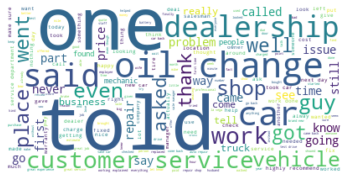

In [7]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word2Vec

In [30]:
from gensim.models import Word2Vec

## Etude de la window size : min_count = 1

In [56]:
window_list = [i for i in range(1,10)]
word = 'car'

df = pd.DataFrame()

for window in window_list:
    model = Word2Vec(df_processed['words_meaningful'], min_count=1, size= 50, workers=3, window=window) 
    for i in range(10):
        similar_word = model.most_similar(word)[i][0]
        similar_word_coeff = round(model.most_similar(word)[i][1], 2)
        df.at[str(i), str(window) + ' words'] = similar_word + ' : ' + str(similar_word_coeff)
    
print(df)

/home/arthur/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/home/arthur/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


           1 words            2 words             3 words          4 words  \
0   vehicle : 0.92     vehicle : 0.92       vehicle : 0.9   vehicle : 0.89   
1     truck : 0.89       truck : 0.89        truck : 0.86     truck : 0.83   
2      jeep : 0.82        jeep : 0.74         jeep : 0.63      jeep : 0.57   
3       suv : 0.78         van : 0.72          van : 0.62       suv : 0.56   
4       van : 0.77         suv : 0.68          yet : 0.58       van : 0.54   
5      baby : 0.77        baby : 0.64     loctaion : 0.57   husband : 0.52   
6  corvette : 0.76  powerstroke : 0.6     actually : 0.57  actually : 0.52   
7    camaro : 0.74     actually : 0.6          suv : 0.57   washout : 0.52   
8      bike : 0.72      course : 0.59      planned : 0.56       yet : 0.51   
9       rig : 0.71     planned : 0.58  powerstroke : 0.55       home : 0.5   

           5 words                                  6 words  \
0   vehicle : 0.88                           vehicle : 0.84   
1     truck : 0

## Etude de la window size : min_count = 10

In [57]:
window_list = [i for i in range(1,10)]
word = 'car'

df = pd.DataFrame()

for window in window_list:
    model = Word2Vec(df_processed['words_meaningful'], min_count=10, size= 50, workers=3, window=window) 
    for i in range(10):
        similar_word = model.most_similar(word)[i][0]
        similar_word_coeff = round(model.most_similar(word)[i][1], 2)
        df.at[str(i), str(window) + ' words'] = similar_word + ' : ' + str(similar_word_coeff)
    
print(df)

/home/arthur/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/home/arthur/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


          1 words          2 words         3 words           4 words  \
0  vehicle : 0.91    vehicle : 0.9  vehicle : 0.88    vehicle : 0.87   
1    truck : 0.86     truck : 0.84    truck : 0.81      truck : 0.81   
2     jeep : 0.76       jeep : 0.7     jeep : 0.62        suv : 0.57   
3      suv : 0.72       suv : 0.66       suv : 0.6        van : 0.56   
4  corvette : 0.7       van : 0.65      van : 0.58       jeep : 0.55   
5      van : 0.69      baby : 0.57    since : 0.47        bmw : 0.43   
6     baby : 0.66  corvette : 0.55      bmw : 0.46       home : 0.43   
7      jaw : 0.65        bmw : 0.5     baby : 0.44   thinking : 0.43   
8  minivan : 0.63      bike : 0.49     home : 0.44  something : 0.42   
9     bike : 0.62    sooner : 0.49      yet : 0.42   actually : 0.41   

            5 words           6 words           7 words           8 words  \
0    vehicle : 0.83    vehicle : 0.81    vehicle : 0.78    vehicle : 0.77   
1      truck : 0.76      truck : 0.69      truck : 0.

## Etude de la size : min_count = 10, window = 3

In [59]:
size_list = [10, 50, 100]
word = 'car'

df = pd.DataFrame()

for size in size_list:
    model = Word2Vec(df_processed['words_meaningful'], min_count=10, size= size, workers=3, window=3) 
    for i in range(10):
        similar_word = model.most_similar(word)[i][0]
        similar_word_coeff = round(model.most_similar(word)[i][1], 2)
        df.at[str(i), str(size) + ' words'] = similar_word + ' : ' + str(similar_word_coeff)
    
print(df)

/home/arthur/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/home/arthur/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


         10 words           50 words          100 words
0      mom : 0.91     vehicle : 0.87     vehicle : 0.86
1  distance : 0.9       truck : 0.82       truck : 0.76
2      trip : 0.9        jeep : 0.61        jeep : 0.59
3     home : 0.89         suv : 0.58         suv : 0.55
4  vehicle : 0.87         van : 0.58         van : 0.54
5   safely : 0.87        home : 0.47         bmw : 0.42
6      bus : 0.85         bmw : 0.45          yet : 0.4
7     look : 0.84       since : 0.44        baby : 0.39
8     away : 0.82        baby : 0.43  girlfriend : 0.37
9    block : 0.81  girlfriend : 0.43     husband : 0.37


## Word2vec

In [68]:
w2v = Word2Vec(df_processed['words_meaningful'], min_count=10, size= 50, workers=3, window=3)

In [69]:
X = w2v[model.wv.vocab]
X.shape

/home/arthur/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(6756, 50)

In [70]:
w2v.most_similar('car')[:10]

/home/arthur/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('vehicle', 0.8937708139419556),
 ('truck', 0.8519301414489746),
 ('jeep', 0.604089081287384),
 ('van', 0.6018075346946716),
 ('suv', 0.5937435626983643),
 ('bmw', 0.4776960611343384),
 ('wife', 0.44510769844055176),
 ('home', 0.43599772453308105),
 ('baby', 0.43370670080184937),
 ('something', 0.43340301513671875)]

In [71]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
result = pca.fit_transform(X)

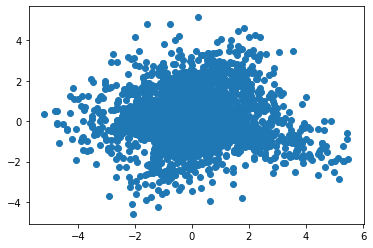

In [72]:
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)[:50]
plt.show()

# Glove

In [31]:
from glove import Corpus, Glove

In [33]:
# creating a corpus object
corpus = Corpus() 
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(df_processed['words_meaningful'].tolist(), window=10)
#creating a Glove object which will use the matrix created in the above lines to create embeddings
#We can set the learning rate as it uses Gradient Descent and number of components
glove = Glove(no_components=50, learning_rate=0.001)
 
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [36]:
glove.most_similar('tire')

[('guy', 0.9992501587639376),
 ('thing', 0.9992455910149266),
 ('one', 0.9992237808865678),
 ('time', 0.9992117115499954)]

In [67]:
glove.most_similar('car')

[('service', 0.9994020455234436),
 ('dealership', 0.9992852160506818),
 ('time', 0.9992754026445235),
 ('go', 0.999238349969895)]

In [63]:
glove.most_similar('price')

[('new', 0.9992888742722004),
 ('place', 0.9992375958786768),
 ('back', 0.9992130927588576),
 ('also', 0.9992104678478692)]

# TF IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(df_processed['processed'].values.astype('U'))

In [78]:
#https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


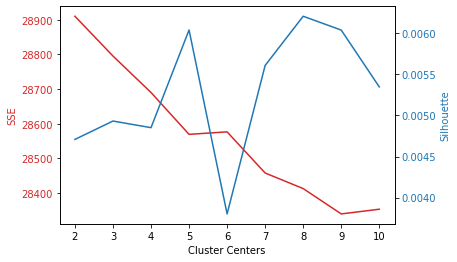

In [20]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    # Sum of squared errors
    sse = []
    silhouette = []
    for k in iters:            
        mkmeans = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data)
        sse.append(mkmeans.inertia_)
        silhouette.append(metrics.silhouette_score(data, mkmeans.labels_, metric='euclidean'))
        print('Fit {} clusters'.format(k))
        
    f, ax1 = plt.subplots(1, 1)
    color = 'tab:red'
    ax1.plot(iters, sse, color=color)
    ax1.set_xlabel('Cluster Centers')
    ax1.set_xticks(iters)
    ax1.set_xticklabels(iters)
    ax1.set_ylabel('SSE', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    color = 'tab:blue'
    ax2 = ax1.twinx()
    ax2.plot(iters, silhouette, color=color)
    ax2.set_ylabel('Silhouette', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
#    ax.set_title('SSE and Silhouette by Cluster Center Plot')
    
find_optimal_clusters(doc_term_matrix, 10)

In [21]:
clusters = MiniBatchKMeans(n_clusters=5, init_size=1024, batch_size=2048, random_state=20).fit_predict(doc_term_matrix)

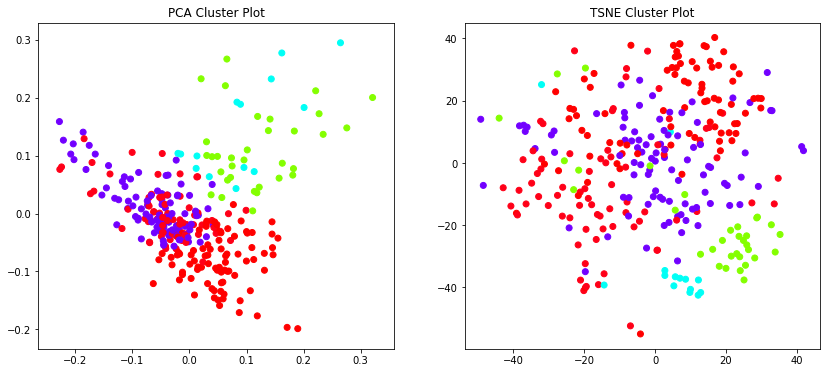

In [22]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm


def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(doc_term_matrix, clusters)

In [27]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    df_output = pd.DataFrame()
    for i,r in df.iterrows():
        cluster = 'Cluster {}'.format(i)
        words = [labels[t] for t in np.argsort(r)[-n_terms:]]
        df_output[cluster] = words
    return df_output
            
df_tfidf = get_top_keywords(doc_term_matrix, clusters, tfidf_vect.get_feature_names(), 10)

In [28]:
print(df_tfidf)

    Cluster 0    Cluster 1 Cluster 2  Cluster 3 Cluster 4
0     vehicle  appointment      told  recommend       guy
1        said         told     place    vehicle     price
2         day         hour     great       work     place
3  experience        place      time        job      auto
4         new        brake       guy       time  mechanic
5        sale         time      flat   friendly    honest
6        time      service       car        car      work
7        told          car       new   customer    repair
8  dealership       change   service      great       car
9         car          oil      tire    service      shop


# Word2vec

In [33]:
w2v = Word2Vec(df_processed['words_meaningful'], min_count=10, size= 50, workers=3, window=3)
X_w2v = w2v[w2v.wv.vocab]
X_w2v.shape

/home/arthur/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(6723, 50)

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


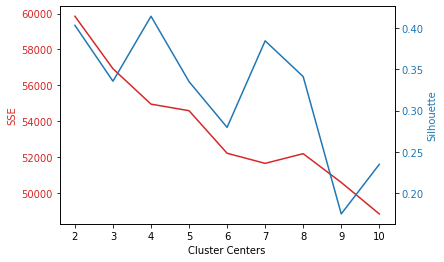

In [34]:
find_optimal_clusters(X_w2v, 10)

In [35]:
clusters_w2v = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=20).fit_predict(X_w2v)

In [36]:
def plot_tsne_pca_dense(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:])
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:]))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

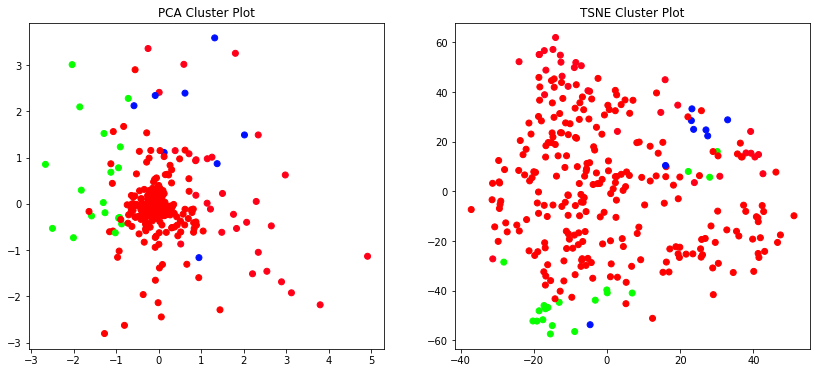

In [37]:
plot_tsne_pca_dense(X_w2v, clusters_w2v)

In [59]:
def get_top_keywords_dense(data, clusters, labels, n_terms):
    df = pd.DataFrame(data).groupby(clusters).mean()

    df_output = pd.DataFrame()
    for i,r in df.iterrows():
        cluster = 'Cluster {}'.format(i)
        print(r[-n_terms:])
        test = [t for t in np.argsort(r[-n_terms:])]
        print(test[0], labels[test[0]])
        print(labels)
        words = [labels[t] for t in np.argsort(r)[-n_terms:]]
        df_output[cluster] = words
        
    return df_output
            
df_w2v = get_top_keywords_dense(X_w2v, clusters_w2v, w2v.wv.index2word, 10)

40   -0.082110
41   -0.028259
42   -0.250289
43    0.100273
44   -0.172712
45    0.031816
46    0.134201
47   -0.108289
48    0.066480
49    0.132626
Name: 0, dtype: float32
2 would
['car', 'service', 'would', 'get', 'time', 'back', 'work', 'great', 'told', 'vehicle', 'new', 'one', 'customer', 'go', 'place', 'could', 'price', 'guy', 'said', 'shop', 'day', 'oil', 'dealership', 'tire', 'even', 'took', 'done', 'repair', 'got', 'went', 'like', 'experience', 'take', 'need', 'change', 'u', 'good', 'never', 'know', 'called', 'needed', 'call', 'hour', 'going', 'year', 'recommend', 'make', 'problem', 'part', 'first', 'also', 'came', 'come', 'sale', 'manager', 'mechanic', 'another', 'right', 'always', 'honest', 'really', 'business', 'issue', 'well', 'say', 'made', 'thing', 'auto', 'way', 'asked', 'job', 'care', 'people', 'best', 'deal', 'friendly', 'give', 'wanted', 'review', 'still', 'brake', 'truck', 'found', 'since', 'fixed', 'minute', 'sure', 'tell', 'look', 'check', 'want', 'see', 'drive', 

In [57]:
print(df_w2v)

  Cluster 0   Cluster 1 Cluster 2 Cluster 3
0     could  experience        go       guy
1     first       going    change    repair
2      take        part       car      make
3      make           u     great       got
4       new       never      make      like
5       got        take     price      went
6      went     vehicle     would      even
7     never       first      part   service
8    called      called     never     great
9     great        call         u      done


# Glove

In [42]:
corpus = Corpus() 
corpus.fit(df_processed['words_meaningful'].tolist(), window=10)
glove = Glove(no_components=50, learning_rate=0.001)

glove.fit(corpus.matrix, epochs=10, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 10 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [43]:
find_optimal_clusters(glove.word_vectors, 10)

KeyboardInterrupt: 

In [119]:
clusters_glove = MiniBatchKMeans(n_clusters=6, init_size=1024, batch_size=2048, random_state=20).fit_predict(glove.word_vectors)

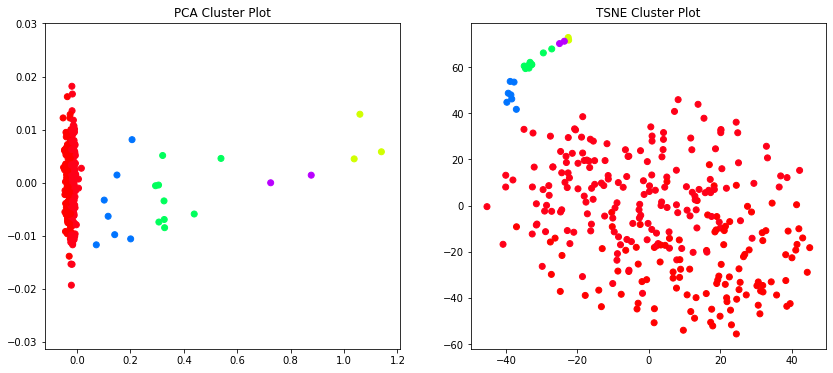

In [120]:
plot_tsne_pca_dense(glove.word_vectors, clusters_glove)

In [127]:
get_top_keywords_dense(glove.word_vectors, clusters_glove, [*glove.dictionary], 10)


Cluster 0
finally,year,pocket,vehicle,exhaust,warranty,speed,drove,sold,somewhat

Cluster 1
knowing,found,charged,dealership,high,clue,every,two,began,sell

Cluster 2
knowing,dealership,charged,found,high,every,clue,two,began,sell

Cluster 3
manufacturer,dealership,two,charged,found,clue,every,high,began,sell

Cluster 4
knowing,found,charged,dealership,high,clue,two,every,began,sell

Cluster 5
process,high,wrecked,problem,vehicle,exhaust,began,somewhat,speed,car


# Comparaison